# Analytics

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: YYYY/0X
##### Professor: Hilmer Neri

##### Members:

- Member x
- Member y

### LIBRARIES

In [175]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

### GRAPH SETTINGS

In [176]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [177]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

In [178]:
repos = [
    '2021.1-Cartografia-social-api-comunidades',
    '2021.1-Cartografia-social-api-gateway',
    '2021.1-Cartografia-social-api-mapas',
    '2021.1-Cartografia-social-api-midia',
    '2021.1-Cartografia-social-api-users'
    #'2021.1-Cartografia-social-front'
]

language = [['2021.1-Cartografia-social-api-comunidades', 'ts'], 
            ['2021.1-Cartografia-social-api-gateway', 'ts'], 
            ['2021.1-Cartografia-social-api-mapas', 'ts'], 
            ['2021.1-Cartografia-social-api-midia', 'ts'], 
            ['2021.1-Cartografia-social-api-users', 'ts']] 
            #['2021.1-Cartografia-social-front', 'js']]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

In [179]:
repos_language

{'2021.1-Cartografia-social-api-comunidades': 'ts',
 '2021.1-Cartografia-social-api-gateway': 'ts',
 '2021.1-Cartografia-social-api-mapas': 'ts',
 '2021.1-Cartografia-social-api-midia': 'ts',
 '2021.1-Cartografia-social-api-users': 'ts'}

##### Path to the folder with all your jsons

In [180]:
jsons = glob('**/*.json') # add the path here

In [181]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    aux_df = df['filename'].str.split(r"fga-eps-mds-2021_1-(.*?)_(.*?)_(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[3]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [182]:
base_component_df = create_base_component_df(jsons)
#print(base_component_df)

In [183]:
base_component_df.head(50)

,metric,value,bestValue,filename,repository,version
92,duplicated_lines_density,0.0,True,fga-eps-mds-2021_1-Cartografia-social-api-comu...,Cartografia-social-api-comunidades,v0.0.1
93,functions,35,NaN,fga-eps-mds-2021_1-Cartografia-social-api-comu...,Cartografia-social-api-comunidades,v0.0.1
94,security_rating,1.0,True,fga-eps-mds-2021_1-Cartografia-social-api-comu...,Cartografia-social-api-comunidades,v0.0.1
95,files,30,NaN,fga-eps-mds-2021_1-Cartografia-social-api-comu...,Cartografia-social-api-comunidades,v0.0.1
96,complexity,35,NaN,fga-eps-mds-2021_1-Cartografia-social-api-comu...,Cartografia-social-api-comunidades,v0.0.1
97,ncloc,336,NaN,fga-eps-mds-2021_1-Cartografia-social-api-comu...,Cartografia-social-api-comunidades,v0.0.1
98,reliability_rating,1.0,True,fga-eps-mds-2021_1-Cartografia-social-api-comu...,Cartografia-social-api-comunidades,v0.0.1
99,comment_lines_density,0.0,False,fga-eps-mds-2021_1-Cartografia-social-api-comu...,Cartografia-social-api-comunidades,v0.0.1
47,duplicated_lines_density,0.0,True,fga-eps-mds-2021_1-Cartografia-social-api-comu...,Cartografia-social-api-comunidades,v0.0.2
48,functions,16,NaN,fga-eps-mds-2021_1-Cartografia-social-api-comu...,Cartografia-social-api-comunidades,v0.0.2


#### Create dataframe per file

In [184]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [185]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'ts')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # replace TeamName by yours.    
    aux_df = df['filename'].str.split(r"fga-eps-mds-2021_1-(.*?)_(.*?)_(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[3]
    
    df = df.sort_values(by=['repository', 'version'])

    df.to_csv('result2.csv')
    
    return df

In [186]:
file_component_df = create_file_df(jsons)


In [187]:
#print(file_component_df['version'])
file_component_df = file_component_df.sort_values(by='version')
#print(file_component_df)

In [188]:
#file_component_df.head(100)
file_component_df.repository.unique()

array(['Cartografia-social-api-comunidades',
       'Cartografia-social-api-mapas', 'Cartografia-social-api-users',
       'Cartografia-social-api-gateway', 'Cartografia-social-api-midia'],
      dtype=object)

#### Create dataframe per repository

In [189]:
repository_dataframes = {} 

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df
    
repository_dataframes.keys()

dict_keys(['2021.1-Cartografia-social-api-comunidades', '2021.1-Cartografia-social-api-gateway', '2021.1-Cartografia-social-api-mapas', '2021.1-Cartografia-social-api-midia', '2021.1-Cartografia-social-api-users'])

In [190]:
api_comunidades_df = file_component_df[file_component_df['repository'] == 'Cartografia-social-api-comunidades']
api_gateway_df = file_component_df[file_component_df['repository'] == 'Cartografia-social-api-gateway']
api_mapas_df = file_component_df[file_component_df['repository'] == 'Cartografia-social-api-mapas']
api_midia_df = file_component_df[file_component_df['repository'] == 'Cartografia-social-api-midia']
api_users_df = file_component_df[file_component_df['repository'] == 'Cartografia-social-api-users']
#front_df = file_component_df[file_component_df['repository'] == '2021.1-Cartografia-social-api-front']
#print(api_comunidades_df)

### Measure calculations according Q-Rapids quality model

# Quality Aspect - Maintainability
## Factor - Code Quality

##### COMPLEXITY

In [191]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [192]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [193]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

In [194]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)
    
    return ncloc

# Quality Aspect - Reliability
## Factor - Testing Status

##### Passed tests

In [195]:
def m4(df):

    passed_tests = df['test_success_density'].astype(float).median() / 100

    return passed_tests

##### Fast test builds

In [196]:
def m5(df):

    density_fast_test_builds = len(df[(df['test_execution_time'].astype(float)) < 300]) / sum(df['tests'].astype(float))

    return density_fast_test_builds

##### Test coverage

In [197]:
def m6(df):

    density_test_coverage = len(df[(df['coverage'].astype(float) > 60)]) / len(df)

    return density_test_coverage

### Calculate m1, m2, m3, m4, m5 and m6 for each repository

In [198]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []

    ncloc_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        m4_list.append(m3(version_df))
        m5_list.append(m3(version_df))
        m6_list.append(m3(version_df))

        ncloc_list.append(_ncloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'm4': m3_list,
                               'm5': m3_list,
                               'm6': m3_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list
                              })
        
    return metrics_df

In [199]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():   
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df
    
repository_dataframes.keys()

dict_keys(['2021.1-Cartografia-social-api-comunidades', '2021.1-Cartografia-social-api-gateway', '2021.1-Cartografia-social-api-mapas', '2021.1-Cartografia-social-api-midia', '2021.1-Cartografia-social-api-users'])

In [200]:
api_comunidades_metrics = create_metrics_df(api_comunidades_df)
api_gateway_metrics = create_metrics_df(api_gateway_df)
api_mapas_metrics = create_metrics_df(api_mapas_df)
api_midia_metrics = create_metrics_df(api_midia_df)
api_users_metrics = create_metrics_df(api_users_df)
#front_metrics = create_metrics_df(front_df)
...

Ellipsis

In [201]:
all_metrics = pd.concat([api_comunidades_metrics, api_gateway_metrics, api_mapas_metrics, api_midia_metrics, api_users_metrics], ignore_index=True)

# Visualização dos Dados de [Maintainability e Reliability] 

- De cada repositório do nosso micro-serviço

## Análise de estatistica descritiva

- Realiza o cálculo de dados estatísticos de medidas de tendência central, como média, mediana, moda e percentis. Já as medidas de dispersão são o mínimo, máximo, desvio padrão e variância.Esta fase é a fase inicial da nossa análise de dados para descrever e resumir os nossos dados análisados.

Interpretando os dados:

- Média: Média dos valores do conjunto de dados
- Mediana: A mediana é o valor da váriavel que ocupa posição central do conjunto de dados ordenado.
- Moda: Valor mais recorrente do conjunto de dados.
- Máximo: Maior valor do conjunto de dados
- Desvio padrão (std): Indica a dispersão do conjunto de dados, quanto mais próximo esse valor estiver de 0 mais homogêneo é o conjunto.
- Variância: Menor valor do conjunto de dados.
- Percentis: Os percentis incluidos na saída estão entre 0 e 1 e retornam o percentis de 25%, 50% e 75%

In [330]:
def descriptive_statistics(df):
    #Gera uma estatísticas descritivas excluindo NaN values
    metrics = df.describe()
    
    median = df.median()
  
    variance = df.var()
    variance_df = pd.DataFrame({"var": variance,
                               "median": median})
    variance_df = variance_df.T
    
    return metrics.append(variance_df).T

## Matriz de Correlação

- Colocar Descrição

In [331]:
def correlationMatrix(df):
    corrMatrix = df.corr()
    return corrMatrix

### Gráfico Box-Plot

- colocar descrição

In [332]:
def generate_boxplot(df, repository):
    fig = plt.figure(figsize=(10, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.boxplot(df['m1'])
    plt.show()
    plt.title(f"{repository}:COMMENTS")
    plt.boxplot(df['m2'])
    plt.show()
    plt.title(f"{repository}:DUPLICATION")
    plt.boxplot(df['m3'])
    plt.show()
   # plt.title(f"{repository}:MAINTAINABILITY")
   # plt.boxplot(df['totalAC1'])
   # plt.show()

### Percentis Table

In [333]:
#def calculate_ac(df):
#    df['asc1'] = (df['m1'] + df['m2'] + df['m3']) / 3
#    df['ac1'] = df['asc1']
#    df['totalAC1'] = df['asc1']
#    return df

In [334]:
#def calculate_ac2(issue_df):
#    aux_df = pd.DataFrame({
#        "asc2": [],
#        "totalAC2": []
#    })
#    aux_df['asc2'] = (issue_df['m7'] + issue_df['m9']) / 2
#    aux_df['totalAC2'] = aux_df['asc2']
#    return pd.concat([issue_df, aux_df], 1)

#issue_df_v2 = calculate_ac2(issue_df)

In [335]:
#api_comunidades_metrics = calculate_ac(api_comunidades_metrics)
#api_gateway_metrics = calculate_ac(api_gateway_metrics)
#api_mapas_metrics = calculate_ac(api_mapas_metrics)
#api_midia_metrics = calculate_ac(api_midia_metrics)
#api_users_metrics = calculate_ac(api_users_metrics)
#all_metrics = calculate_ac(all_metrics)

In [336]:
#api_comunidades_metrics = calculate_ac2(api_comunidades_metrics)
#api_gateway_metrics = calculate_ac2(api_gateway_metrics)
#api_mapas_metrics = calculate_ac2(api_mapas_metrics)
#api_midia_metrics = calculate_ac2(api_midia_metrics)
#api_users_metrics = calculate_ac2(api_users_metrics)
#all_metrics = calculate_ac2(all_metrics)'''

In [337]:
#def descriptive_percentage(df):
#    df_copy = df.copy()
#    df_copy['m1'] = df_copy['m1'] * 100
#    df_copy['m2'] = df_copy['m2'] * 100
#    df_copy['m3'] = df_copy['m3'] * 100
#    df_copy['asc1'] = df_copy['asc1'] * 100
#    df_copy['ac1'] = df_copy['ac1'] * 100
#    df_copy['totalAC1'] = df_copy['totalAC1'] * 100
#    descriptive_percentage_product = df_copy.to_html(formatters={
 #   'm1': '{:.4}%'.format,
 #   'm2': '{:.4}%'.format,
#    'm3': '{:.4}%'.format,
 #   'asc1': '{:.4}%'.format,
#    'ac1': '{:.4}%'.format,
#    'totalAC1': '{:.4}%'.format,
#    'asc2': '{:.4}%'.format,
#    'totalAC2': '{:.4}%'.format,
#    })
#    display(HTML(descriptive_percentage_product))

In [338]:
#plot history
def plot_history(df, repository):
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.plot(df['m1'], linewidth=3, marker='o', markersize=10)
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMMENTS")
    plt.plot(df['m2'], linewidth=3, marker='o', markersize=10)
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:DUPLICATIONS")
    plt.plot(df['m3'], linewidth=3, marker='o', markersize=10)

In [339]:
#fig = plt.figure(figsize=(20, 10))

#plt.plot(api_comunidades_metrics['m1'], linewidth=3, marker='o', markersize=10)
#plt.plot(api_comunidades_metrics['m2'], linewidth=3, marker='o', markersize=10)
#plt.plot(api_comunidades_metrics['m3'], linewidth=3, marker='o', markersize=10)
#plt.plot(api_comunidades_metrics['m4'], linewidth=3, marker='o', markersize=10)
#plt.plot(api_comunidades_metrics['m5'], linewidth=3, marker='o', markersize=10)
#plt.plot(api_comunidades_metrics['m6'], linewidth=3, marker='o', markersize=10)

In [340]:
#plot_history(generic_df, repository)

## Análise de  [Maintainability e Reliability] do repositório Cartografia-social-api-comunidades

In [341]:
generic_df = api_comunidades_metrics.copy()
repository = "API-COMUNIDADES"

### Estatistica descritiva - comunidades

In [356]:
descriptive_statistics(generic_df)

,count,mean,std,min,25%,50%,75%,max,var,median
m1,8.0,0.620845,0.059756,0.523810,0.583333,0.612500,0.673077,0.692308,0.003571,0.612500
m2,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
m3,8.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
m4,8.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
m5,8.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
m6,8.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
ncloc,8.0,333.250000,118.426288,161.000000,262.000000,335.000000,414.750000,482.000000,14024.785714,335.000000
code_quality,8.0,0.534879,0.019719,0.502857,0.522500,0.532125,0.552115,0.558462,0.000389,0.532125
testing_status,8.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


### Cálculo da moda - comunidades

In [362]:
generic_df.mode(numeric_only=True)

,m1,m2,m3,m4,m5,m6,ncloc,code_quality,testing_status
0,0.583333,0.0,1.0,1.0,1.0,1.0,161,0.522500,1.0
1,0.692308,NaN,NaN,NaN,NaN,NaN,196,0.558462,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,284,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,334,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,336,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,393,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,480,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,482,NaN,NaN


### Tabela de porcentagem - comunidades

In [343]:
#descriptive_percentage(generic_df)

### Matriz de correlação - comunidades

In [364]:
correlationMatrix(generic_df)

,m1,m2,m3,m4,m5,m6,ncloc,code_quality,testing_status
m1,1.00000,NaN,NaN,NaN,NaN,NaN,0.55621,1.00000,NaN
m2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ncloc,0.55621,NaN,NaN,NaN,NaN,NaN,1.00000,0.55621,NaN
code_quality,1.00000,NaN,NaN,NaN,NaN,NaN,0.55621,1.00000,NaN
testing_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
### Box-plot - comunidades

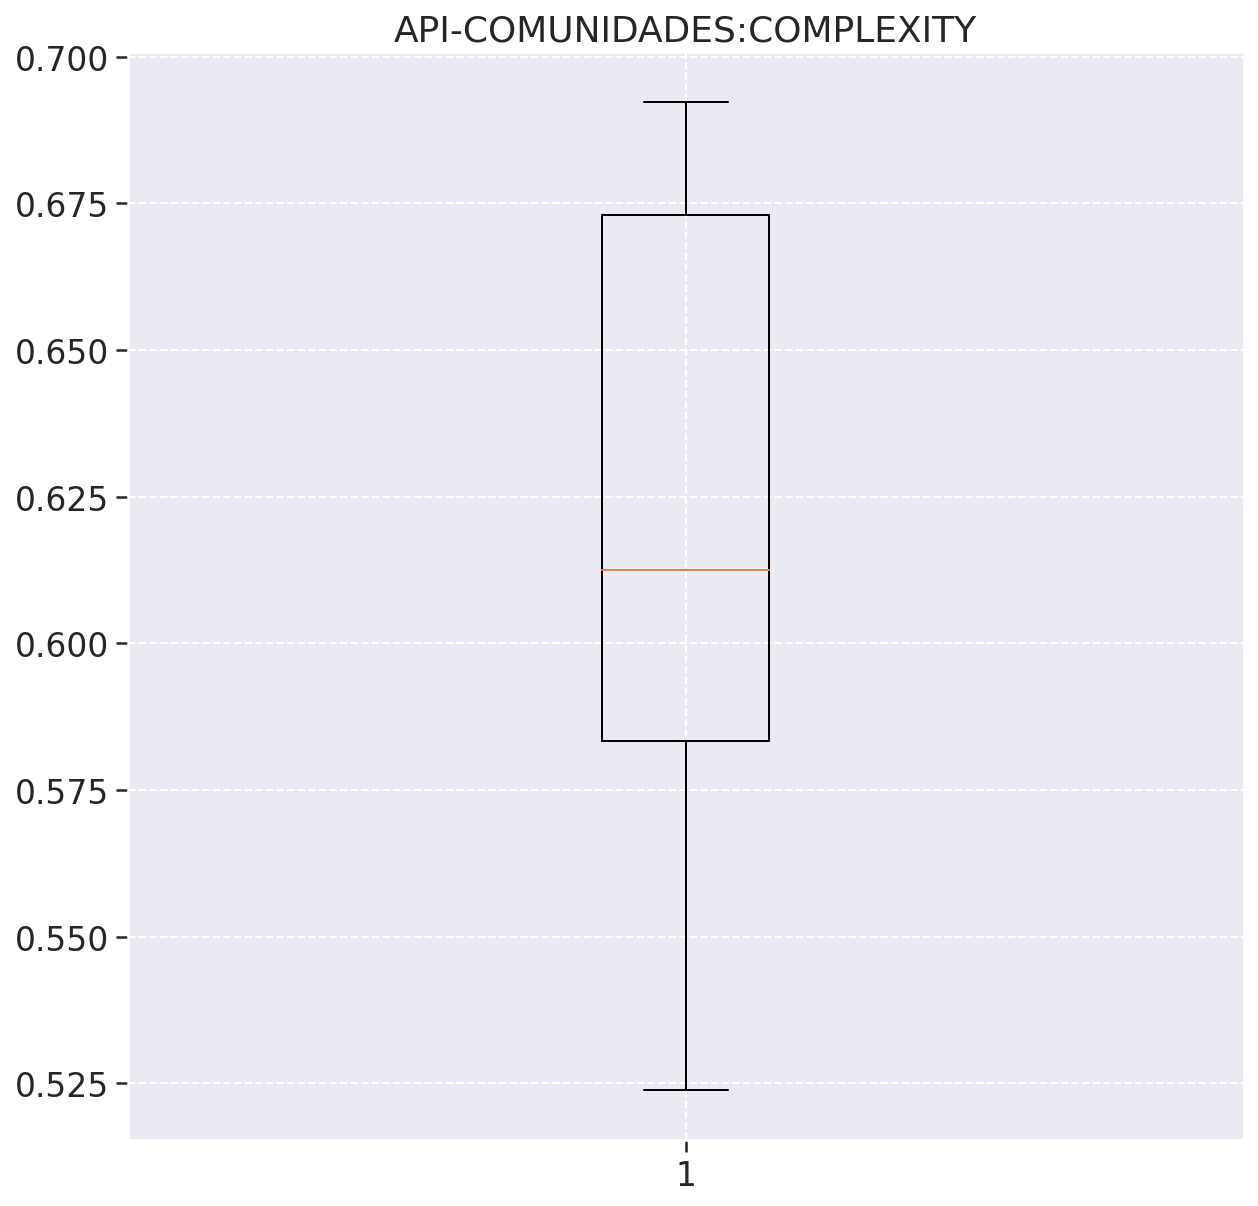

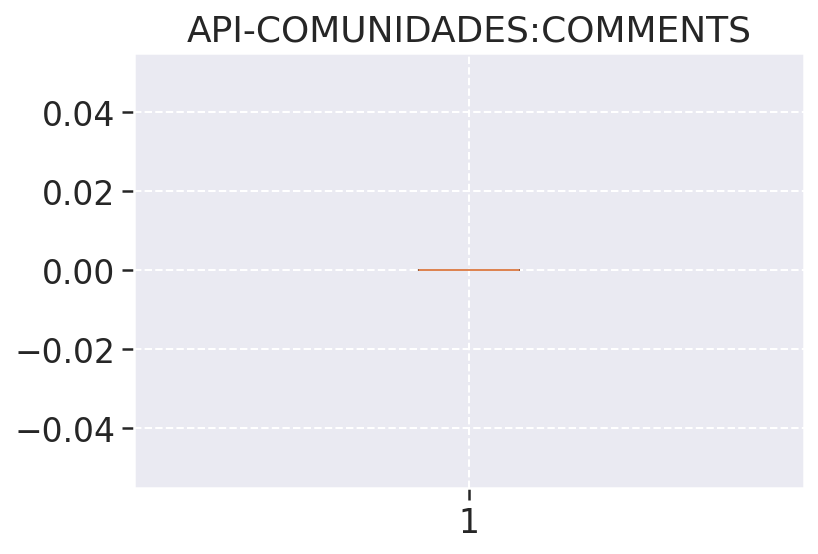

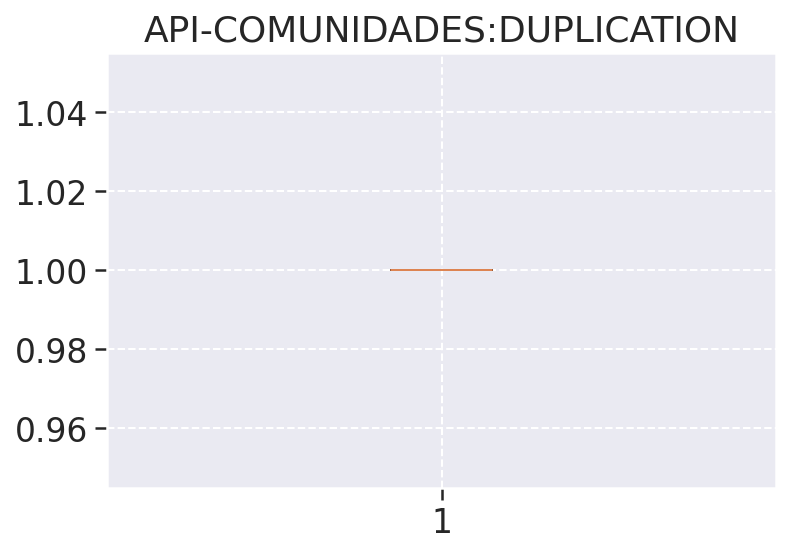

In [346]:
generate_boxplot(generic_df, repository)

### Sub characteristic aggregation

- You must do this for each of your repositories

In [347]:
psc1 = 1
psc2 = 1
pc1 = 0.5
pc2 = 0.5
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33
pm4 = 0.15
pm5 = 0.15
pm6 = 0.7

api_comunidades_metrics['code_quality'] = ((api_comunidades_metrics['m1']*pm1) + (api_comunidades_metrics['m2']*pm2) + (api_comunidades_metrics['m3']*pm3)) * psc1
api_gateway_metrics['code_quality'] = ((api_gateway_metrics['m1']*pm1) + (api_gateway_metrics['m2']*pm2) + (api_gateway_metrics['m3']*pm3)) * psc1
api_mapas_metrics['code_quality'] = ((api_mapas_metrics['m1']*pm1) + (api_mapas_metrics['m2']*pm2) + (api_mapas_metrics['m3']*pm3)) * psc1
api_midia_metrics['code_quality'] = ((api_midia_metrics['m1']*pm1) + (api_midia_metrics['m2']*pm2) + (api_midia_metrics['m3']*pm3)) * psc1
api_users_metrics['code_quality'] = ((api_users_metrics['m1']*pm1) + (api_users_metrics['m2']*pm2) + (api_users_metrics['m3']*pm3)) * psc1
...

api_comunidades_metrics['testing_status'] = ((api_comunidades_metrics['m4']*pm4) + (api_comunidades_metrics['m5']*pm5) + (api_comunidades_metrics['m6']*pm6)) * psc2
api_gateway_metrics['testing_status'] = ((api_gateway_metrics['m4']*pm4) + (api_gateway_metrics['m5']*pm5) + (api_gateway_metrics['m6']*pm6)) * psc2
api_mapas_metrics['testing_status'] = ((api_mapas_metrics['m4']*pm4) + (api_mapas_metrics['m5']*pm5) + (api_mapas_metrics['m6']*pm6)) * psc2
api_midia_metrics['testing_status'] = ((api_midia_metrics['m4']*pm4) + (api_midia_metrics['m5']*pm5) + (api_midia_metrics['m6']*pm6)) * psc2
api_users_metrics['testing_status'] = ((api_users_metrics['m4']*pm4) + (api_users_metrics['m5']*pm5) + (api_users_metrics['m6']*pm6)) * psc2

...

Ellipsis

In [348]:
fig = plt.figure(figsize=(20, 10))


#plt.plot(api_comunidades_metrics['code_quality'], linewidth=3, marker='o', markersize=5)
#plt.plot(repo2['code_quality'], linewidth=3, marker='o', markersize=5)
...

Ellipsis

<Figure size 1440x720 with 0 Axes>

In [349]:
fig = plt.figure(figsize=(20, 10))


#plt.plot(api_comunidades_metrics['testing_status'], linewidth=3, marker='o', markersize=5)
#plt.plot(repo2['testing_status'], linewidth=3, marker='o', markersize=5)
...


Ellipsis

<Figure size 1440x720 with 0 Axes>

In [350]:
metrics_df = pd.concat([api_comunidades_metrics, api_gateway_metrics, api_mapas_metrics, api_midia_metrics, api_users_metrics], ignore_index=True)
metrics_df['maintainability'] = metrics_df['code_quality'] * pc1
metrics_df['Reliability'] = metrics_df['testing_status'] * pc2
metrics_df['total'] = metrics_df['maintainability'] + metrics_df['Reliability']

In [351]:
metrics_df

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,maintainability,Reliability,total
0,0.523810,0.000000,1.000000,1.000000,1.000000,1.000000,Cartografia-social-api-comunidades,v0.0.1,336,0.502857,1.000000,0.251429,0.500000,0.751429
1,0.625000,0.000000,1.000000,1.000000,1.000000,1.000000,Cartografia-social-api-comunidades,v0.0.3,161,0.536250,1.000000,0.268125,0.500000,0.768125
2,0.600000,0.000000,1.000000,1.000000,1.000000,1.000000,Cartografia-social-api-comunidades,v0.0.4,196,0.528000,1.000000,0.264000,0.500000,0.764000
3,0.583333,0.000000,1.000000,1.000000,1.000000,1.000000,Cartografia-social-api-comunidades,v0.0.5,284,0.522500,1.000000,0.261250,0.500000,0.761250
4,0.583333,0.000000,1.000000,1.000000,1.000000,1.000000,Cartografia-social-api-comunidades,v0.0.6,334,0.522500,1.000000,0.261250,0.500000,0.761250
5,0.666667,0.000000,1.000000,1.000000,1.000000,1.000000,Cartografia-social-api-comunidades,v0.0.7,393,0.550000,1.000000,0.275000,0.500000,0.775000
6,0.692308,0.000000,1.000000,1.000000,1.000000,1.000000,Cartografia-social-api-comunidades,v0.0.8,480,0.558462,1.000000,0.279231,0.500000,0.779231
7,0.692308,0.000000,1.000000,1.000000,1.000000,1.000000,Cartografia-social-api-comunidades,v0.0.9,482,0.558462,1.000000,0.279231,0.500000,0.779231
8,0.703704,0.000000,0.925926,0.925926,0.925926,0.925926,Cartografia-social-api-gateway,v0.0.1,1031,0.537778,0.925926,0.268889,0.462963,0.731852
9,0.384615,0.076923,1.000000,1.000000,1.000000,1.000000,Cartografia-social-api-gateway,v0.0.10,429,0.482308,1.000000,0.241154,0.500000,0.741154


In [352]:
#fig = plt.figure(figsize=(20, 10))


#plt.plot(metrics_df['maintainability'], linewidth=3, marker='o', markersize=5)
#plt.plot(metrics_df['Reliability'], linewidth=3, marker='o', markersize=5)


#plt.ylim(.45,.7)

In [353]:
#fig = plt.figure(figsize=(20, 10))


#plt.plot(metrics_df['total'], linewidth=3, marker='o', markersize=5)


#plt.ylim(.45,.7)


In [354]:
# ANALYSIS_DATE FORMAT: MM-DD-YYYY

metrics_df.to_excel('data/fga-eps-mds-2021_1-Cartografia-Social-ANALYSYS.xlsx', index = False)
metrics_df.to_csv('data/fga-eps-mds-2021_1-Cartografia-Social-ANALYSYS.csv', index = False)